![Github_top](https://user-images.githubusercontent.com/33735397/206313977-e67ba652-3340-4a1b-b1d1-141d8d5001f2.PNG)

# Community Streamflow Evaluation System (CSES)

National-scale streamflow modeling remains a modern challenge, as changes in the underlying hydrology from land use and land cover (LULC) change, anthropogentic streamflow modification, and general process components (reach length, hydrogeophysical processes, precipitation, temperature, etc) greatly influence  hydrological modeling.
In a changing climate, there is a need to anticipate flood intensity, impacts of groundwater depletion on streamflow, western montain low-flow events, eastern rain-on-snow events, storm-induced flooding, and other severe environmental problems that challenge the management of water resources.
Given the National Water Model (NWM) bridges the gap between the spatially coarse USGS streamflow observations by providing a near-continuous 2.7 million reach predictions of streamflow, there lies the potential to improve upon the capabilities of the model by characterizing predictive performance across the heterogeneity of proces ses and land covers present at the national scale. 
The python-based Community Streamflow Evaluation System (CSES) package provides a tool to evaluate national hydrogrphy dataset (NHD) based model outputs with colocated USGS/NWIS streamflow monitorng stations (parameter: 060). 
The package contains three key methods for evaluation: State-based LULC analysis, HUC level analysis, and USGS station-based reach analysis.
Below is a description of each method and application.
While designed to us the NWM version 2.1 retrospective dataset, with minimal modification the tool should be able to take in other model formulations.
By using the CSES, researchers can identify locations where a model may benefit from further training/calibration/parameterization or a need for new model processes/features (e.g., integration of reservoir release operaitons) to ultimately create new post-processing methods and/or hydrological modeling formulations to improve streamflow prediction capabilities with respect to modeling needs (e.g., stormflow, supply, emergency management, flooding, etc).   


In [1]:
import ROSET_AWS
import os
import warnings
warnings.filterwarnings("ignore")
#set path directory
cwd = os.getcwd()

# Streamflow Evaluation: Reach Class

This section of code allows the user to evaluate modeled streamflow with selected NWIS monitoring sites of interest. 
The user can input multiple USGS sites (e.g., ['02378780', '02339495', '02342500'])
Please enter a start date, end date, and model to compare (NWM v2.1 is set up).
NWM retrospective data spans from 1980 - 2020, USGS/NWIS data is location dependent.

![REach_Eval_top](https://user-images.githubusercontent.com/33735397/206324095-dcc59508-bf4c-43a8-9a19-4fc5c573e205.PNG)

In [5]:
#Put in model of interest for evaluation, NWIS/USGS site id(s), and the start/end date

model = 'NWM_v2.1'
#example with list of USGS sites along the Provo River, Utah
NWIS_list = ['10150500', '10140100', '10149000', '10164500', '10155000', '10155200'] #, '10155500', '10155200', '10154200']
#plot list of top performing sites
Eval_Metric = 'KGE'
#Performance_Threshold = 0.70
#NWIS_list = HUC_Eval.Eval[HUC_Eval.Eval[Eval_Metric] >Performance_Threshold]['NWIS_site_id'].values.tolist()

startDT ='2013-4-01'
endDT ='2013-10-30'
#set path directory
cwd = os.getcwd()


Reach_Eval = ROSET_AWS.Reach_Eval(model , NWIS_list, startDT, endDT, cwd)

#Get Streamstats and colocated NHD reaches
Reach_Eval.get_NHD_Model_info()

#Get USGS and NWM data
Reach_Eval.prepare_comparison()

Getting geospatial information for NHD reaches


Dropping USGS sites with no NHD reach
Getting  NWM_v2.1  data
Getting data for NWM:  10349360


Getting data for NWM:  10275828


Getting data for NWM:  10349162


Getting data for NWM:  10329013


Getting data for NWM:  10373622


Getting data for NWM:  10373794


100% |########################################################################|


Getting NWIS data


100% |########################################################################|


## Interactive plotting on map
Set frequency for graph:
* <span style="color:red">'D'</span>: Daily
* <span style="color:red">'M'</span>: monthly, 
* <span style="color:red">'Q'</span>: quarterly, 
* <span style="color:red">'A'</span>: annual

Set supply = <span style="color:green"> **True** </span> to evaluate cumulative water year totals or <span style = "color:green"> **False** </span> to look at desired temporal resolution

In [1]:
#Plot the locations
Reach_Eval.Map_Plot_Eval('D', supply = False)

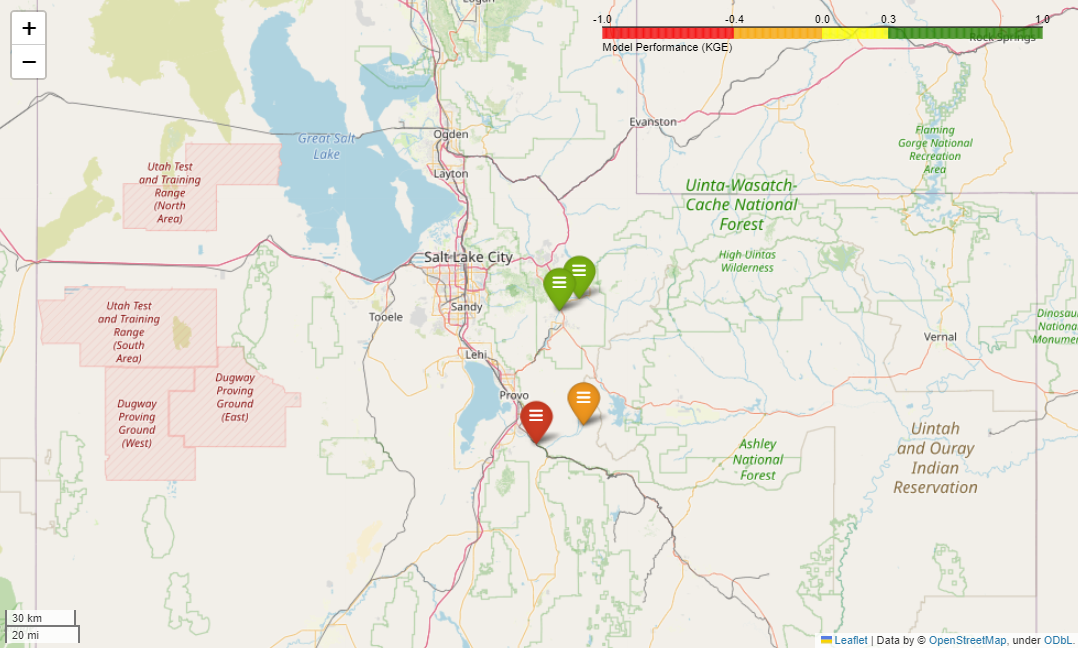

## Interactive time series plotting
Set frequency for graph:
* <span style="color:red">'D'</span>: Daily
* <span style="color:red">'M'</span>: monthly, 
* <span style="color:red">'Q'</span>: quarterly, 
* <span style="color:red">'A'</span>: annual

Set supply = <span style="color:green"> **True** </span> to evaluate cumulative water year totals or <span style = "color:green"> **False** </span> to look at desired temporal resolution

,NWIS_site_id,NHD_reachid,Location,RMSE,MaxError,MAPE,KGE,Drainage_area_mi2,Mean_Basin_Elev_ft,Perc_Forest,Perc_Imperv,Perc_Herbace,Mean_Ann_Precip_in,Ann_low_cfs,Ann_mean_cfs,Ann_hi_cfs
0,10155000,10373622,"PROVO RIVER NEAR HAILSTONE, UT",8418,11824,146.581412,0.585176,229.0000,8640.0,74.4,0.1300,3.19,29.6,81.9,273.0,449.0
1,10150500,10349360,"SPANISH FORK AT CASTILLA, UT",8275,11891,62.307775,0.179763,629.0000,7100.0,57.5,0.0839,5.28,21.1,155.0,255.0,498.1
2,10149000,10349162,"SIXTH WATER CRK AB SYAR TUN NR SPRINGVILLE, UT",1196,1537,64.271705,-0.022424,15.3000,7600.0,56.0,0.0372,3.78,27.2,19.4,33.0,50.1
3,10164500,10329013,AMERICAN FK AB UPPER POWERPLANT NR AMERICAN FK...,6705,12866,339.190962,-3.480304,51.1000,8470.0,71.5,0.0173,3.42,39.4,16.8,53.0,111.8
4,10155200,10373794,"PROVO RIV AT RIV ROAD BRIDGE NR HEBER CITY, UT",14147,27537,102.334171,-3.798624,269.0000,8360.0,72.2,0.2100,2.95,27.9,147.9,232.0,381.1
5,10140100,10275828,"OGDEN RIVER BL PINEVIEW RES NR HUNTSVILLE, UT",9477,12852,854.730182,-5.562487,0.0929,6060.0,11.2,0.0000,26.80,30.3,17.0,98.0,313.4


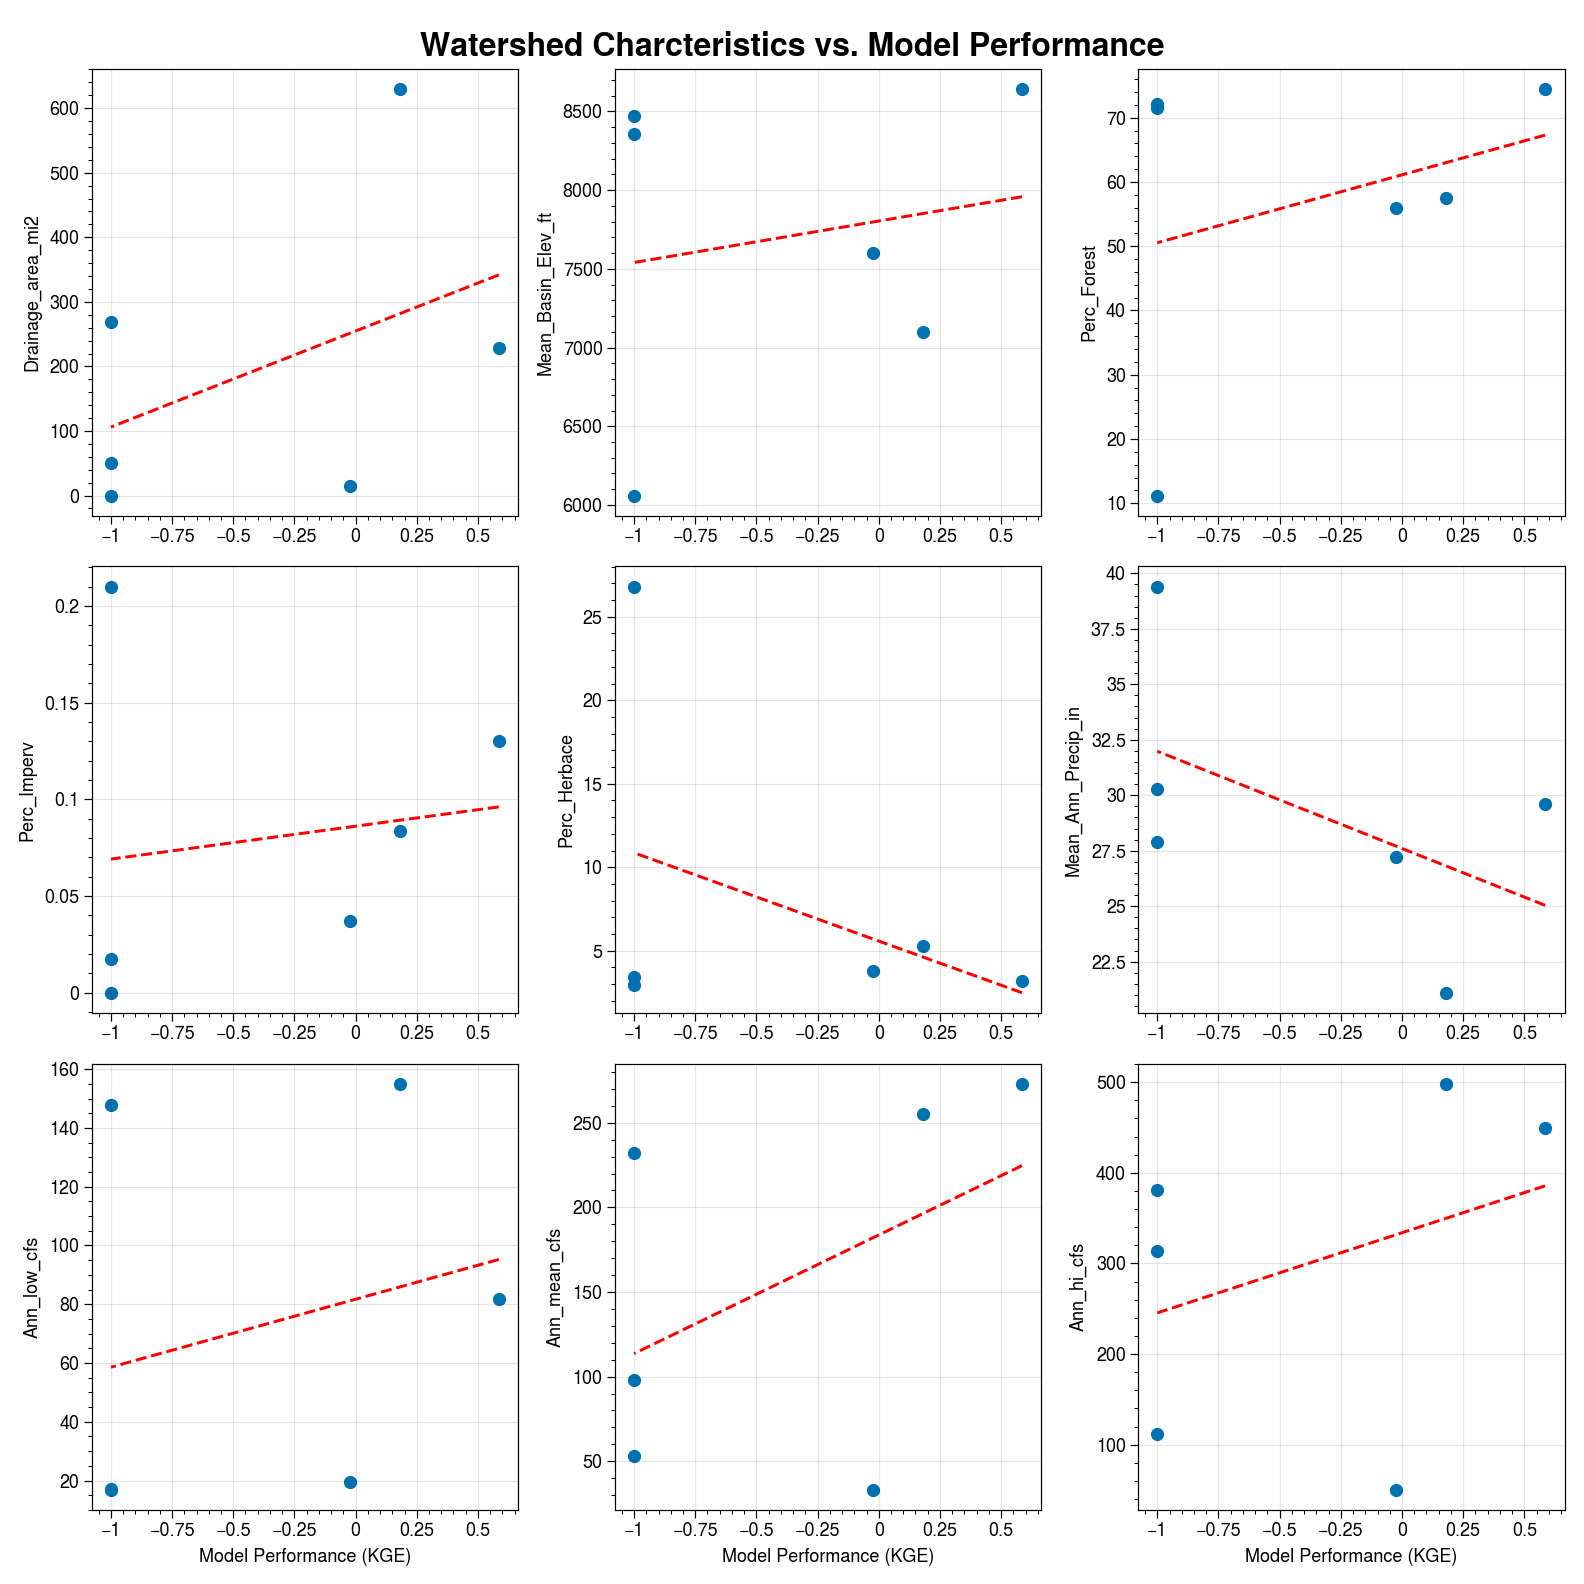

PROVO RIVER NEAR HAILSTONE, UT


,USGS: 10155000,NWM_v2.1: 10373622
Datetime,,
2013-04-30,8582.746176,7057.497
2013-05-31,46406.706526,35253.774
2013-06-30,20680.642925,31948.113
2013-07-31,2709.370871,14533.407
2013-08-31,2660.223430,11110.749
2013-09-30,3935.637407,8590.356
2013-10-31,5373.256486,8459.478


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10155000               :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_10373622 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                            :Rectangles   [x0,y0,x1,y1]
      .Text.I                                  :Text   [x,y]
      .Text.II                                 :Text   [x,y]
      .Text.III                                :Text   [x,y]
      .Text.IV                                 :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

SPANISH FORK AT CASTILLA, UT


,USGS: 10150500,NWM_v2.1: 10349360
Datetime,,
2013-04-30,7582.310387,19473.060
2013-05-31,20240.625640,25953.504
2013-06-30,28437.851593,20702.520
2013-07-31,25975.441235,18955.497
2013-08-31,27538.478877,16409.325
2013-09-30,9956.994177,14186.382
2013-10-31,6473.730724,13853.238


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10150500               :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_10349360 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                            :Rectangles   [x0,y0,x1,y1]
      .Text.I                                  :Text   [x,y]
      .Text.II                                 :Text   [x,y]
      .Text.III                                :Text   [x,y]
      .Text.IV                                 :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

SIXTH WATER CRK AB SYAR TUN NR SPRINGVILLE, UT


,USGS: 10149000,NWM_v2.1: 10349162
Datetime,,
2013-04-30,2159.627039,622.662
2013-05-31,1946.273196,781.302
2013-06-30,1919.969716,773.370
2013-07-31,1671.293279,735.693
2013-08-31,1752.143683,642.492
2013-09-30,1713.167408,545.325
2013-10-31,1715.359023,485.835


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10149000               :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_10349162 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                            :Rectangles   [x0,y0,x1,y1]
      .Text.I                                  :Text   [x,y]
      .Text.II                                 :Text   [x,y]
      .Text.III                                :Text   [x,y]
      .Text.IV                                 :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

AMERICAN FK AB UPPER POWERPLANT NR AMERICAN FK, UT


,USGS: 10164500,NWM_v2.1: 10329013
Datetime,,
2013-04-30,944.023668,5411.607
2013-05-31,3265.515599,16131.705
2013-06-30,3699.761585,13819.527
2013-07-31,2136.651508,4376.481
2013-08-31,823.659699,1923.510
2013-09-30,644.065183,2712.744
2013-10-31,598.223593,4630.305


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10164500               :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_10329013 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                            :Rectangles   [x0,y0,x1,y1]
      .Text.I                                  :Text   [x,y]
      .Text.II                                 :Text   [x,y]
      .Text.III                                :Text   [x,y]
      .Text.IV                                 :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

PROVO RIV AT RIV ROAD BRIDGE NR HEBER CITY, UT


,USGS: 10155200,NWM_v2.1: 10373794
Datetime,,
2013-04-30,7720.438707,7715.853
2013-05-31,8097.931669,35634.510
2013-06-30,8053.417464,33028.848
2013-07-31,11470.312350,15310.743
2013-08-31,13238.817883,11826.612
2013-09-30,10465.943513,9230.865
2013-10-31,8246.036942,9084.123


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10155200               :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_10373794 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                            :Rectangles   [x0,y0,x1,y1]
      .Text.I                                  :Text   [x,y]
      .Text.II                                 :Text   [x,y]
      .Text.III                                :Text   [x,y]
      .Text.IV                                 :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

OGDEN RIVER BL PINEVIEW RES NR HUNTSVILLE, UT


,USGS: 10140100,NWM_v2.1: 10275828
Datetime,,
2013-04-30,764.277112,13601.397
2013-05-31,848.520951,13700.547
2013-06-30,1343.569252,10569.390
2013-07-31,2075.368566,10111.317
2013-08-31,3213.614695,9472.791
2013-09-30,1172.116792,8633.982
2013-10-31,832.655705,8189.790


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10140100               :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_10275828 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                            :Rectangles   [x0,y0,x1,y1]
      .Text.I                                  :Text   [x,y]
      .Text.II                                 :Text   [x,y]
      .Text.III                                :Text   [x,y]
      .Text.IV                                 :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

In [7]:
#Holoviews plots.
freq = 'M'

Reach_Eval.Interactive_Model_Eval(freq, supply =False)

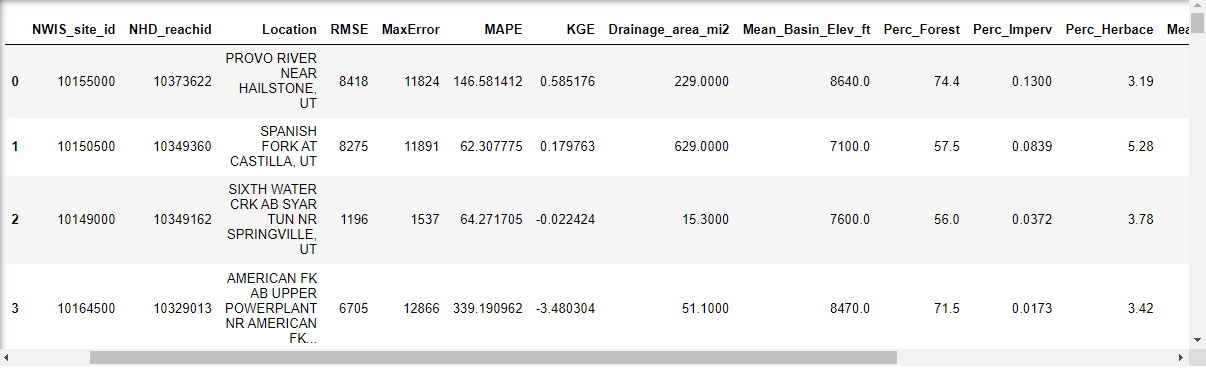

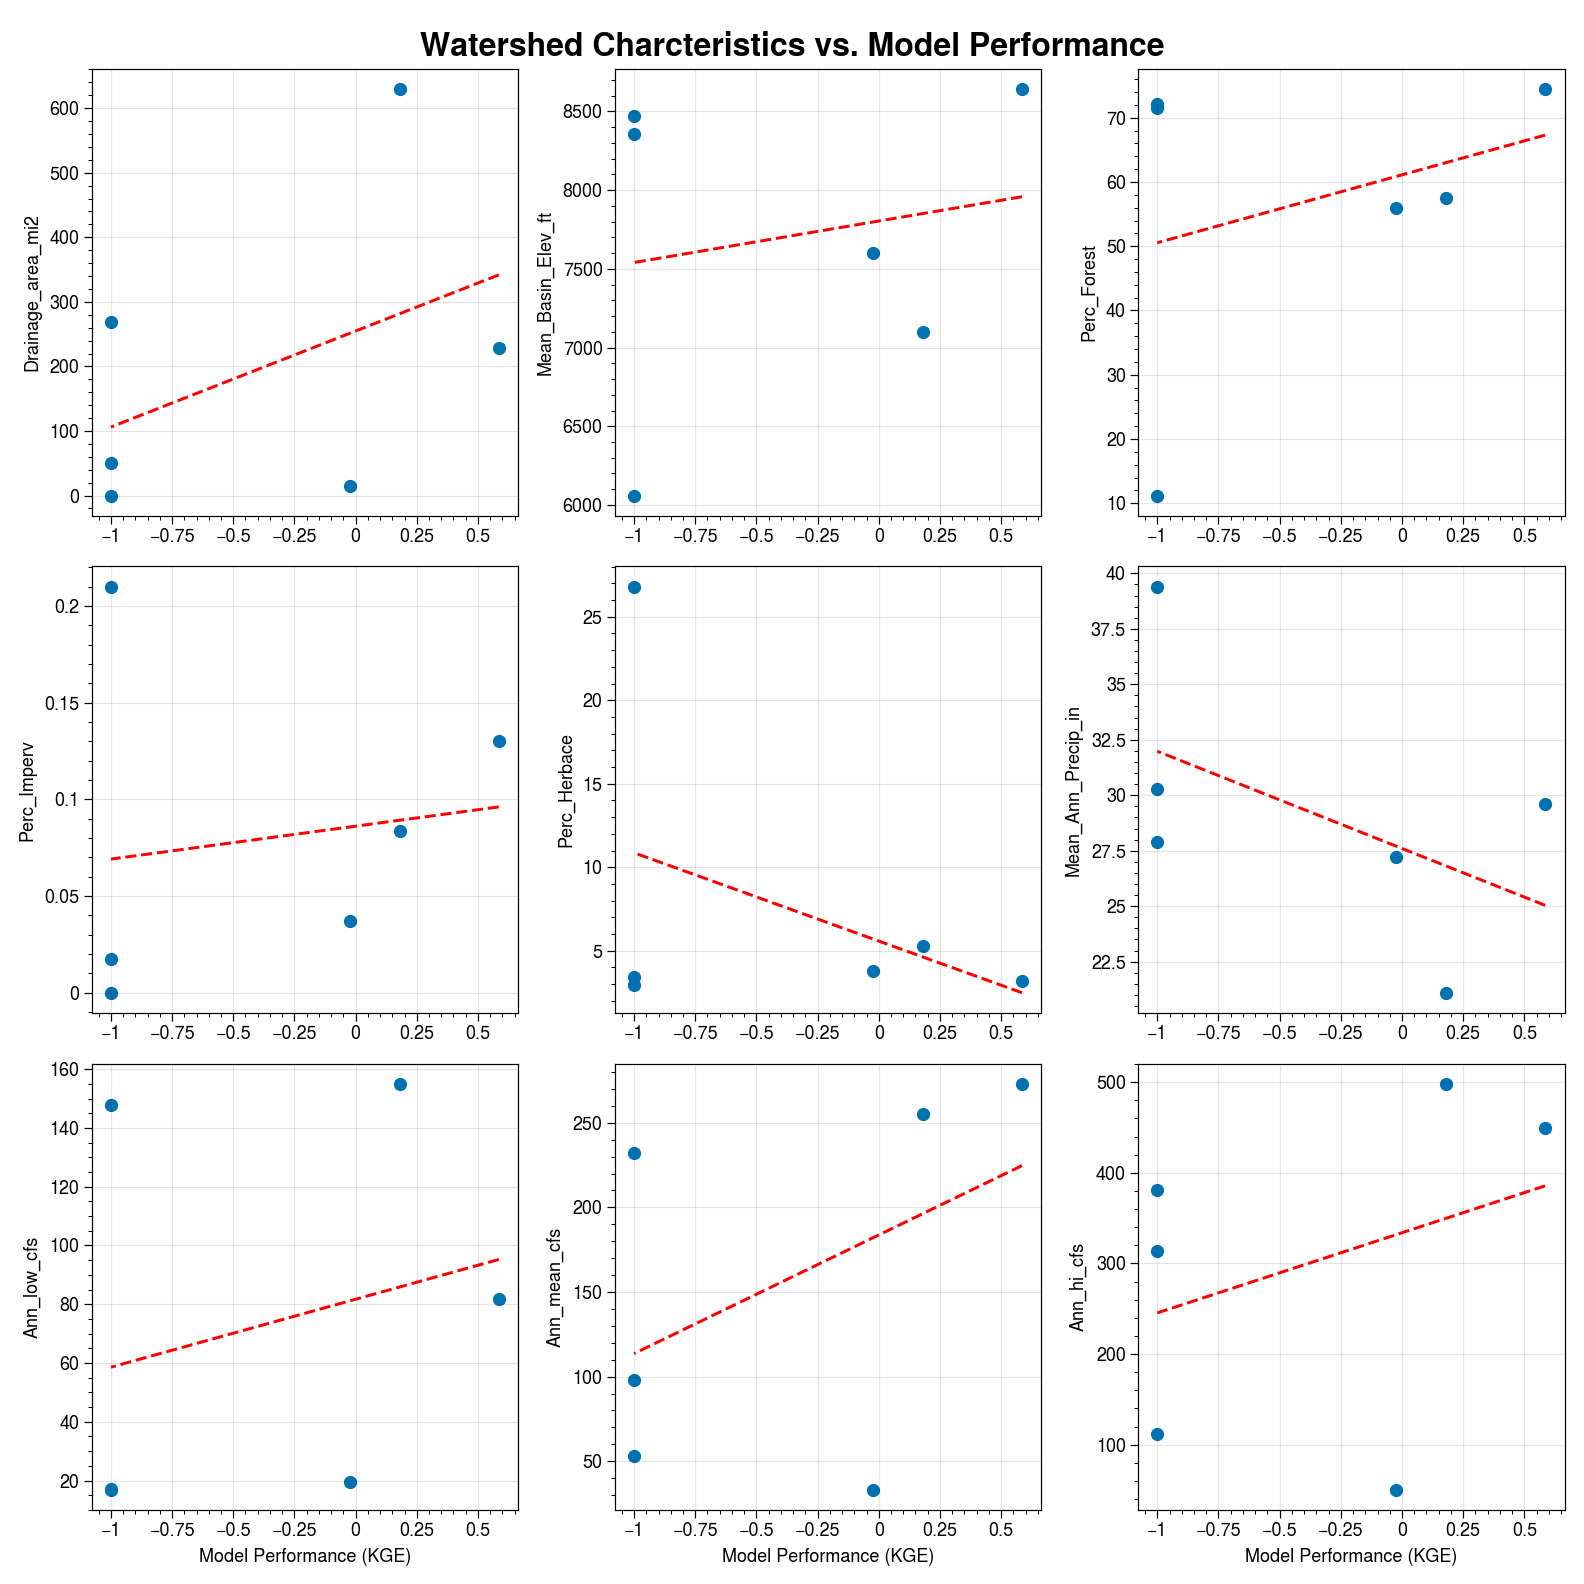

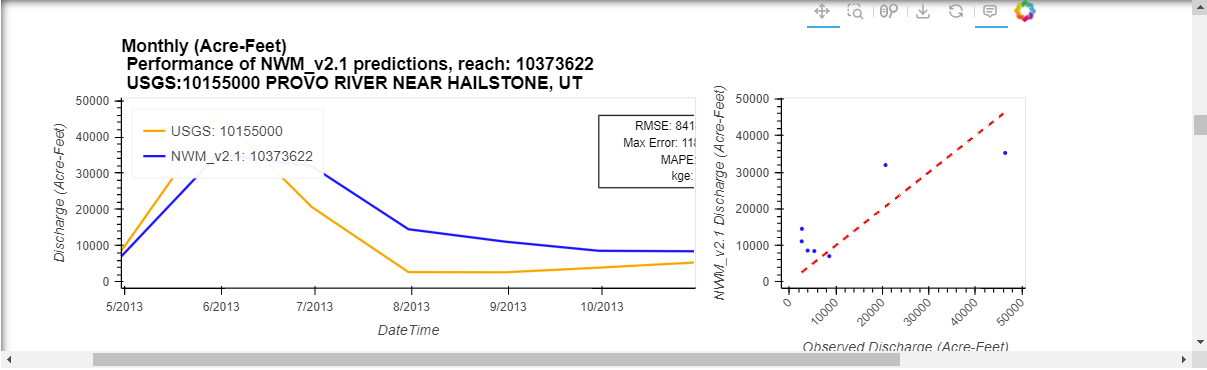